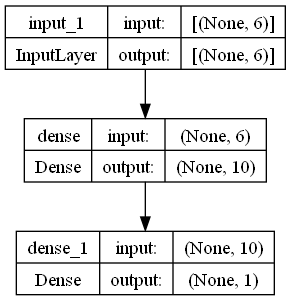

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 6
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,2,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

plot_model(model,to_file='FeaturesPlots/model.png',show_shapes=True)

In [2]:
history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_allFeatures_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

Epoch 1/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1722 - acc: 0.8613 - val_loss: 0.1544 - val_acc: 0.8611
Epoch 2/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1533 - acc: 0.8613 - val_loss: 0.1218 - val_acc: 0.8611
Epoch 3/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1313 - acc: 0.8613 - val_loss: 0.0971 - val_acc: 0.8611
Epoch 4/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1088 - acc: 0.8616 - val_loss: 0.0791 - val_acc: 0.8637
Epoch 5/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0899 - acc: 0.9008 - val_loss: 0.0674 - val_acc: 0.9559
Epoch 6/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0755 - acc: 0.9549 - val_loss: 0.0598 - val_acc: 0.9524
Epoch 7/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0647 - acc: 0.9439 - val_loss: 0.0552 - val_acc: 0.9290
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 18s 1ms/step - loss: 0.0226 - acc: 0.9514 - val_loss: 0.0391 - val_acc: 0.9515
Epoch 61/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0226 - acc: 0.9514 - val_loss: 0.0391 - val_acc: 0.9515
Epoch 62/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9515 - val_loss: 0.0391 - val_acc: 0.9515
Epoch 63/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9515 - val_loss: 0.0391 - val_acc: 0.9516
Epoch 64/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9515 - val_loss: 0.0391 - val_acc: 0.9515
Epoch 65/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0225 - acc: 0.9515 - val_loss: 0.0390 - val_acc: 0.9515
Epoch 66/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0225 - acc: 0.9515 - val_loss: 0.0390 - val_acc: 0.9516
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0216 - acc: 0.9510 - val_loss: 0.0386 - val_acc: 0.9510
Epoch 120/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0216 - acc: 0.9510 - val_loss: 0.0386 - val_acc: 0.9510
Epoch 121/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0216 - acc: 0.9510 - val_loss: 0.0386 - val_acc: 0.9510
Epoch 122/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0216 - acc: 0.9510 - val_loss: 0.0386 - val_acc: 0.9510
Epoch 123/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0216 - acc: 0.9510 - val_loss: 0.0385 - val_acc: 0.9511
Epoch 124/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0215 - acc: 0.9510 - val_loss: 0.0385 - val_acc: 0.9511
Epoch 125/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0215 - acc: 0.9510 - val_loss: 0.0385 - val_acc: 0.9511
Epoch 126/300
15396/

15396/15396 [==============================] - 18s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 236/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 237/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 238/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 239/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 240/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 241/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0209 - acc: 0.9526 - val_loss: 0.0375 - val_acc: 0.9527
Epoch 242/300
15396/15396 [=======

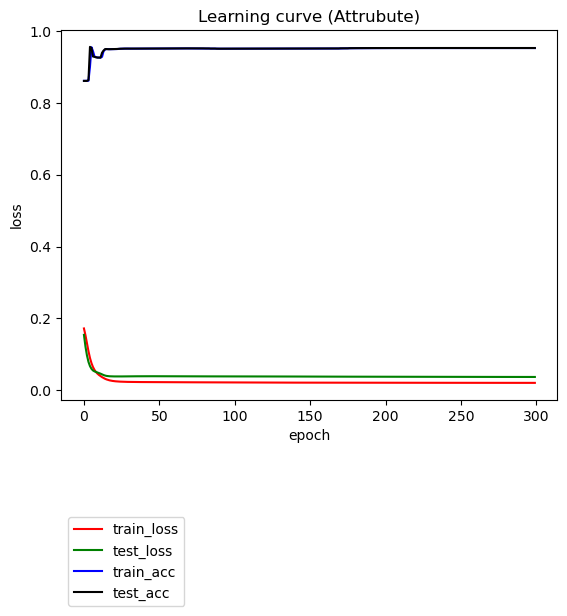

In [3]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_allFeatures_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)

In [4]:
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

# print("\n\na_weight3: ")
# for a in a_weight3:
#     for b in a:
#         print(b,end=",")
        
# print("\n\na_bias3: ")
# for a in a_bias3:
#         print(a,end=",")
        
# g_weight1=model.get_layer(index=0).get_weights()
# g_weight2=model.get_layer(index=1).get_weights()
        
# print(g_weight1)
# print(g_weight2)


a_weight1: 
-2.1095662,-2.159209,-2.51972,0.29016927,-2.0382051,-0.77479863,-2.2325509,-1.8578652,-1.0599688,-2.2450185,-9.816983,-9.85152,-3.6130433,1.3817818,-2.7175672,-1.1617019,-0.5252332,-3.5527856,-0.5005699,-3.769177,-1.8587321,-1.8539385,-0.43848947,-1.698926,-1.0197548,-2.6354125,-0.12451699,-1.5142912,-1.6910163,-0.9330596,-0.45474607,-0.5086948,-1.3383667,0.9709808,-0.95867985,-0.1089984,-0.18093315,-0.71510166,-0.021761239,-1.0369492,0.7523155,0.7339047,-0.3511233,-2.2335403,-0.7770228,-1.3005433,-2.9519691,-0.37962297,-1.9855602,-0.33923012,0.42476094,0.4215061,0.0936193,-2.5338855,-0.48233932,-0.99384475,0.11303166,-0.42611918,-0.6140396,-0.12954515,

a_bias1: 
1.0353637,1.1218994,0.8137333,1.4358728,0.980739,0.8959781,1.1579281,0.95284426,1.1658161,0.90403193,

a_weight2: 
-3.0585058,-3.165357,-2.3281388,-2.2885113,-1.9403934,-1.7498333,-2.2122128,-2.0468612,-2.0176458,-2.2064018,

a_bias2: 
4.1650133,

In [5]:
# import numpy as np

# x=np.array([0,1,2,3,4,5,6,7,8,9])
# av = np.average(x)
# print(av)

Epoch 1/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.1788 - acc: 0.7083 - val_loss: 0.1671 - val_acc: 0.8611
Epoch 2/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1545 - acc: 0.8613 - val_loss: 0.1277 - val_acc: 0.8611
Epoch 3/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1330 - acc: 0.8613 - val_loss: 0.1018 - val_acc: 0.8611
Epoch 4/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1106 - acc: 0.8613 - val_loss: 0.0822 - val_acc: 0.8611
Epoch 5/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0911 - acc: 0.9182 - val_loss: 0.0691 - val_acc: 0.9552
Epoch 6/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0761 - acc: 0.9525 - val_loss: 0.0608 - val_acc: 0.9497
Epoch 7/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0650 - acc: 0.9314 - val_loss: 0.0560 - val_acc: 0.9295
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0257 - acc: 0.9499 - val_loss: 0.0391 - val_acc: 0.9501
Epoch 61/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0256 - acc: 0.9499 - val_loss: 0.0390 - val_acc: 0.9501
Epoch 62/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0256 - acc: 0.9499 - val_loss: 0.0391 - val_acc: 0.9501
Epoch 63/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0256 - acc: 0.9499 - val_loss: 0.0391 - val_acc: 0.9501
Epoch 64/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0256 - acc: 0.9500 - val_loss: 0.0392 - val_acc: 0.9501
Epoch 65/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0256 - acc: 0.9500 - val_loss: 0.0391 - val_acc: 0.9501
Epoch 66/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0256 - acc: 0.9503 - val_loss: 0.0392 - val_acc: 0.9507
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 20s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0394 - val_acc: 0.9500
Epoch 120/300
15396/15396 [==============================] - 21s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0394 - val_acc: 0.9500
Epoch 121/300
15396/15396 [==============================] - 20s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0394 - val_acc: 0.9500
Epoch 122/300
15396/15396 [==============================] - 21s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0394 - val_acc: 0.9500
Epoch 123/300
15396/15396 [==============================] - 20s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0393 - val_acc: 0.9500
Epoch 124/300
15396/15396 [==============================] - 21s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0394 - val_acc: 0.9500
Epoch 125/300
15396/15396 [==============================] - 21s 1ms/step - loss: 0.0254 - acc: 0.9498 - val_loss: 0.0394 - val_acc: 0.9500
Epoch 126/300
15396/

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0392 - val_acc: 0.9493
Epoch 236/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0392 - val_acc: 0.9493
Epoch 237/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0392 - val_acc: 0.9493
Epoch 238/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0392 - val_acc: 0.9493
Epoch 239/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0392 - val_acc: 0.9493
Epoch 240/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0392 - val_acc: 0.9493
Epoch 241/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9492 - val_loss: 0.0391 - val_acc: 0.9493
Epoch 242/300
15396/15396 [=======

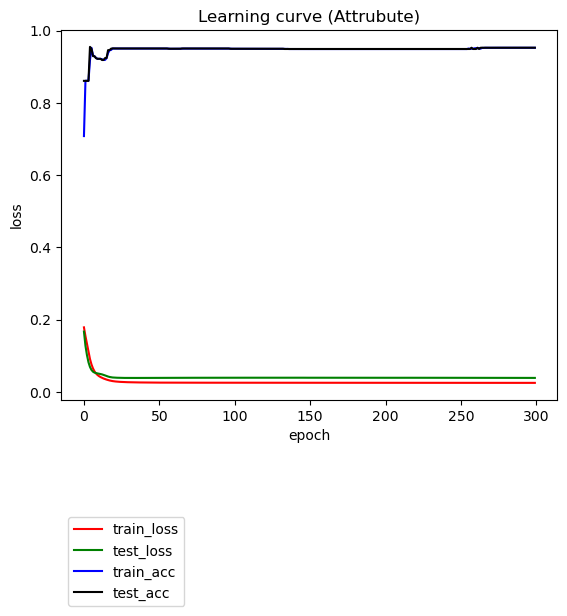


a_weight1: 
-3.9931302,-2.6650257,-1.7715513,-3.1090755,-1.4152541,-2.273971,-3.4510772,-2.123933,-0.25978026,-0.9992292,-1.8437262,-1.6335757,-0.827061,-1.5249261,-0.52787906,-1.3884159,-2.0487819,-0.9749957,0.3655498,-0.4117879,0.0054404424,-0.019226471,-0.13586833,-0.13274279,-0.047048867,-0.008667083,0.0944489,-0.12878409,0.1242766,0.20453158,-1.3096448,-1.5472984,-1.6260796,-1.5922724,-1.7056574,-1.5413712,-1.3546981,-1.6771679,-1.5794203,-1.5544312,1.1233628,0.3248339,-0.25776616,0.63608366,-0.67766124,0.19373254,0.8928638,-0.041108835,-1.8305179,-1.0680988,

a_bias1: 
0.33224753,0.8189223,0.78683674,0.79837453,1.2444384,0.5835176,0.39983886,0.895633,0.8715698,1.1463834,

a_weight2: 
-2.172799,-1.9367733,-1.5400078,-2.139479,-1.8747907,-1.5941752,-2.123101,-1.7456464,-1.4710727,-1.8249818,

a_bias2: 
3.8646355,

In [6]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[1,2,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_noMPD_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_noMPD_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.1760 - acc: 0.8301 - val_loss: 0.1644 - val_acc: 0.8613
Epoch 2/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1593 - acc: 0.8613 - val_loss: 0.1366 - val_acc: 0.8613
Epoch 3/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1395 - acc: 0.8613 - val_loss: 0.1144 - val_acc: 0.8613
Epoch 4/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1155 - acc: 0.8694 - val_loss: 0.0953 - val_acc: 0.8877
Epoch 5/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0927 - acc: 0.9121 - val_loss: 0.0810 - val_acc: 0.9257
Epoch 6/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0745 - acc: 0.9204 - val_loss: 0.0714 - val_acc: 0.9159
Epoch 7/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0615 - acc: 0.9101 - val_loss: 0.0658 - val_acc: 0.9076
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9130 - val_loss: 0.0636 - val_acc: 0.9132
Epoch 61/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9130 - val_loss: 0.0636 - val_acc: 0.9132
Epoch 62/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9130 - val_loss: 0.0635 - val_acc: 0.9134
Epoch 63/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9130 - val_loss: 0.0635 - val_acc: 0.9134
Epoch 64/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9131 - val_loss: 0.0636 - val_acc: 0.9134
Epoch 65/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9130 - val_loss: 0.0635 - val_acc: 0.9135
Epoch 66/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0405 - acc: 0.9131 - val_loss: 0.0635 - val_acc: 0.9135
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0399 - acc: 0.9146 - val_loss: 0.0629 - val_acc: 0.9149
Epoch 120/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0399 - acc: 0.9145 - val_loss: 0.0627 - val_acc: 0.9150
Epoch 121/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9146 - val_loss: 0.0628 - val_acc: 0.9149
Epoch 122/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9146 - val_loss: 0.0626 - val_acc: 0.9151
Epoch 123/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9147 - val_loss: 0.0627 - val_acc: 0.9151
Epoch 124/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9148 - val_loss: 0.0627 - val_acc: 0.9151
Epoch 125/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0398 - acc: 0.9148 - val_loss: 0.0627 - val_acc: 0.9152
Epoch 126/300
15396/

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0387 - acc: 0.9180 - val_loss: 0.0613 - val_acc: 0.9186
Epoch 236/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0387 - acc: 0.9182 - val_loss: 0.0613 - val_acc: 0.9182
Epoch 237/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0387 - acc: 0.9181 - val_loss: 0.0613 - val_acc: 0.9183
Epoch 238/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0387 - acc: 0.9180 - val_loss: 0.0613 - val_acc: 0.9186
Epoch 239/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0387 - acc: 0.9181 - val_loss: 0.0614 - val_acc: 0.9183
Epoch 240/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0387 - acc: 0.9180 - val_loss: 0.0614 - val_acc: 0.9183
Epoch 241/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0387 - acc: 0.9180 - val_loss: 0.0614 - val_acc: 0.9183
Epoch 242/300
15396/15396 [=======

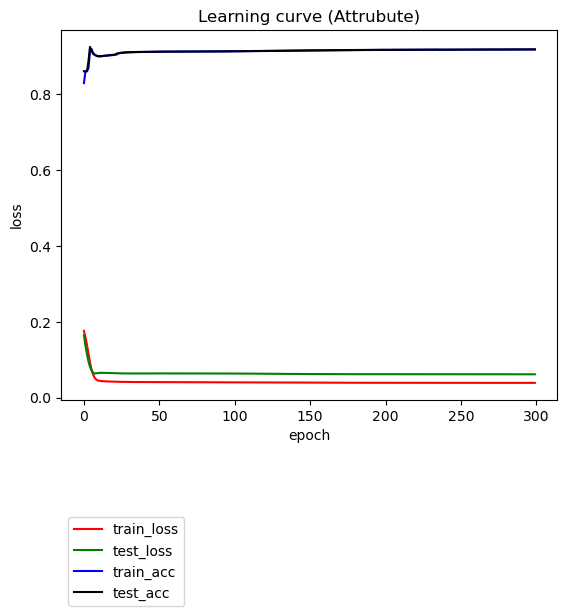


a_weight1: 
-0.6124378,-1.2069638,-1.0079257,-0.86705697,-1.2771977,0.70393896,-1.2866447,-0.48081002,-1.5150118,-1.8707395,-1.4234748,-0.9600467,-0.6695061,-1.601905,-0.28447643,1.3420272,-0.541387,-1.3176425,0.14146905,0.054381017,-0.3423471,-1.3361771,-1.3148606,-1.1648135,-1.4444693,0.38410023,-1.4256774,-0.4851463,-1.5476227,-1.7977825,0.23438033,-2.8760054,-1.3867798,-2.910221,-1.3691807,-0.3890024,-1.8886545,-0.17701381,-1.1616066,-1.7130934,-2.335375,1.4664263,-0.008085084,1.3589816,0.08195285,2.5610237,0.6637673,-1.6393129,-0.003133829,0.5865098,

a_bias1: 
1.1546682,1.0000272,0.7563798,0.8458515,0.7172648,-1.213315,0.72582346,1.0867479,0.6258997,0.7663763,

a_weight2: 
-1.865642,-2.594975,-1.5325016,-2.4117296,-1.5467626,2.8457181,-1.7833017,-1.7122254,-1.5969222,-2.1434517,

a_bias2: 
1.8851511,

In [7]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,2,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_noCBF_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_noCBF_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.1714 - acc: 0.8613 - val_loss: 0.1577 - val_acc: 0.8614
Epoch 2/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1463 - acc: 0.8613 - val_loss: 0.1238 - val_acc: 0.8614
Epoch 3/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1141 - acc: 0.8853 - val_loss: 0.0952 - val_acc: 0.9561
Epoch 4/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0825 - acc: 0.9524 - val_loss: 0.0732 - val_acc: 0.9298
Epoch 5/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0591 - acc: 0.9281 - val_loss: 0.0590 - val_acc: 0.9257
Epoch 6/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0448 - acc: 0.9255 - val_loss: 0.0520 - val_acc: 0.9250
Epoch 7/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0373 - acc: 0.9254 - val_loss: 0.0484 - val_acc: 0.9270
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 19s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0399 - val_acc: 0.9506
Epoch 61/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0399 - val_acc: 0.9506
Epoch 62/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0399 - val_acc: 0.9506
Epoch 63/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0398 - val_acc: 0.9506
Epoch 64/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0399 - val_acc: 0.9506
Epoch 65/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0399 - val_acc: 0.9506
Epoch 66/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.0236 - acc: 0.9507 - val_loss: 0.0399 - val_acc: 0.9506
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0394 - val_acc: 0.9507
Epoch 120/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0393 - val_acc: 0.9507
Epoch 121/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0393 - val_acc: 0.9508
Epoch 122/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0393 - val_acc: 0.9508
Epoch 123/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0393 - val_acc: 0.9508
Epoch 124/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0393 - val_acc: 0.9507
Epoch 125/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0233 - acc: 0.9509 - val_loss: 0.0392 - val_acc: 0.9508
Epoch 126/300
15396/

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0229 - acc: 0.9513 - val_loss: 0.0387 - val_acc: 0.9511
Epoch 178/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0229 - acc: 0.9513 - val_loss: 0.0386 - val_acc: 0.9511
Epoch 179/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0229 - acc: 0.9513 - val_loss: 0.0387 - val_acc: 0.9511
Epoch 180/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0229 - acc: 0.9513 - val_loss: 0.0386 - val_acc: 0.9512
Epoch 181/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0229 - acc: 0.9513 - val_loss: 0.0386 - val_acc: 0.9511
Epoch 182/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0228 - acc: 0.9513 - val_loss: 0.0386 - val_acc: 0.9512
Epoch 183/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0228 - acc: 0.9513 - val_loss: 0.0385 - val_acc: 0.9512
Epoch 184/300
15396/15396 [=======

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0383 - val_acc: 0.9513
Epoch 236/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9515 - val_loss: 0.0382 - val_acc: 0.9514
Epoch 237/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0383 - val_acc: 0.9514
Epoch 238/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0382 - val_acc: 0.9514
Epoch 239/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0383 - val_acc: 0.9513
Epoch 240/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0382 - val_acc: 0.9514
Epoch 241/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0382 - val_acc: 0.9514
Epoch 242/300
15396/15396 [=======

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0226 - acc: 0.9516 - val_loss: 0.0381 - val_acc: 0.9515
Epoch 294/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0226 - acc: 0.9517 - val_loss: 0.0381 - val_acc: 0.9514
Epoch 295/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0226 - acc: 0.9517 - val_loss: 0.0381 - val_acc: 0.9514
Epoch 296/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0226 - acc: 0.9516 - val_loss: 0.0381 - val_acc: 0.9514
Epoch 297/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0226 - acc: 0.9517 - val_loss: 0.0381 - val_acc: 0.9514
Epoch 298/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0226 - acc: 0.9517 - val_loss: 0.0381 - val_acc: 0.9514
Epoch 299/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0226 - acc: 0.9516 - val_loss: 0.0381 - val_acc: 0.9514
Epoch 300/300
15396/15396 [=======

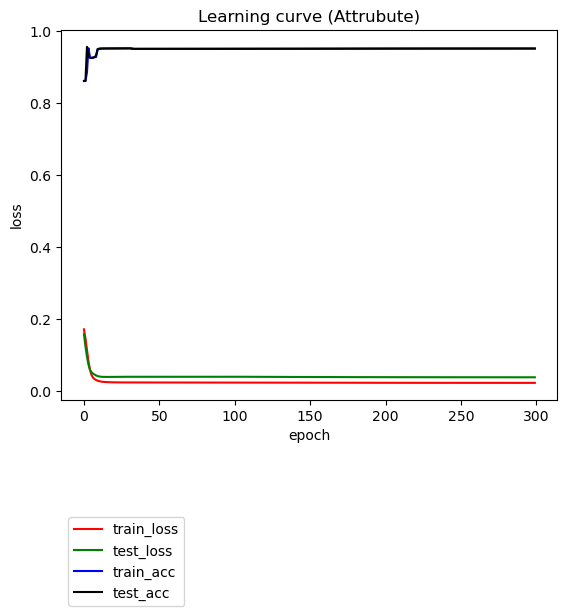


a_weight1: 
-1.6210499,-1.5694121,0.0097347805,-1.0608325,-2.48218,-1.3841894,2.7756517,0.2253463,-1.2883803,-0.8375856,-2.172834,-1.9866847,0.1326684,-1.0695878,-5.278819,-1.6543123,6.4957156,-0.011188636,-1.4411234,-0.85116404,-0.18176246,-0.21360016,-0.53828007,-0.16877474,-0.21141946,-0.23294401,0.16459894,0.6600611,-0.23412251,-0.11283826,-0.51530844,-0.6551925,1.2793139,-1.3093388,0.59700745,-0.8394628,-0.7881947,-1.2283112,-1.0638821,-1.2193747,-0.4465322,-0.5822489,1.1509664,-0.8114368,0.12405985,-0.64780617,-0.27384257,-1.37812,-0.76423806,-0.87234765,

a_bias1: 
0.7955529,0.85837704,-1.362641,0.8985389,0.5387431,0.78205854,-0.41158262,1.3768462,0.8604238,0.8999523,

a_weight2: 
-1.771037,-1.7327331,1.9968512,-1.706908,-2.8595338,-1.729478,2.0824544,-1.8281446,-1.6235805,-1.6034038,

a_bias2: 
1.0859838,

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_noCUD_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_noCUD_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1745 - acc: 0.8612 - val_loss: 0.1607 - val_acc: 0.8616
Epoch 2/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1576 - acc: 0.8612 - val_loss: 0.1317 - val_acc: 0.8616
Epoch 3/300
15396/15396 [==============================] - 19s 1ms/step - loss: 0.1362 - acc: 0.8612 - val_loss: 0.1067 - val_acc: 0.8616
Epoch 4/300
15396/15396 [==============================] - 18s 1ms/step - loss: 0.1093 - acc: 0.8715 - val_loss: 0.0842 - val_acc: 0.8931
Epoch 5/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0833 - acc: 0.9394 - val_loss: 0.0674 - val_acc: 0.9526
Epoch 6/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0629 - acc: 0.9476 - val_loss: 0.0571 - val_acc: 0.9402
Epoch 7/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0492 - acc: 0.9278 - val_loss: 0.0522 - val_acc: 0.9223
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9522 - val_loss: 0.0392 - val_acc: 0.9517
Epoch 61/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9522 - val_loss: 0.0392 - val_acc: 0.9516
Epoch 62/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9522 - val_loss: 0.0392 - val_acc: 0.9517
Epoch 63/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9522 - val_loss: 0.0391 - val_acc: 0.9517
Epoch 64/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0224 - acc: 0.9523 - val_loss: 0.0391 - val_acc: 0.9517
Epoch 65/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9523 - val_loss: 0.0392 - val_acc: 0.9517
Epoch 66/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9523 - val_loss: 0.0391 - val_acc: 0.9517
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0389 - val_acc: 0.9510
Epoch 120/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0388 - val_acc: 0.9510
Epoch 121/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0388 - val_acc: 0.9510
Epoch 122/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0389 - val_acc: 0.9510
Epoch 123/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0388 - val_acc: 0.9510
Epoch 124/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0389 - val_acc: 0.9510
Epoch 125/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9515 - val_loss: 0.0388 - val_acc: 0.9511
Epoch 126/300
15396/

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0219 - acc: 0.9513 - val_loss: 0.0388 - val_acc: 0.9509
Epoch 178/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0218 - acc: 0.9513 - val_loss: 0.0388 - val_acc: 0.9509
Epoch 179/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0218 - acc: 0.9514 - val_loss: 0.0388 - val_acc: 0.9508
Epoch 180/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0218 - acc: 0.9513 - val_loss: 0.0388 - val_acc: 0.9508
Epoch 181/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0218 - acc: 0.9513 - val_loss: 0.0388 - val_acc: 0.9509
Epoch 182/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0218 - acc: 0.9514 - val_loss: 0.0388 - val_acc: 0.9509
Epoch 183/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0218 - acc: 0.9514 - val_loss: 0.0388 - val_acc: 0.9508
Epoch 184/300
15396/15396 [=======

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0215 - acc: 0.9524 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 236/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0215 - acc: 0.9523 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 237/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0214 - acc: 0.9523 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 238/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0214 - acc: 0.9524 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 239/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0214 - acc: 0.9523 - val_loss: 0.0385 - val_acc: 0.9519
Epoch 240/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0214 - acc: 0.9524 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 241/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0214 - acc: 0.9524 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 242/300
15396/15396 [=======

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 294/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 295/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 296/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 297/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 298/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 299/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0213 - acc: 0.9526 - val_loss: 0.0383 - val_acc: 0.9521
Epoch 300/300
15396/15396 [=======

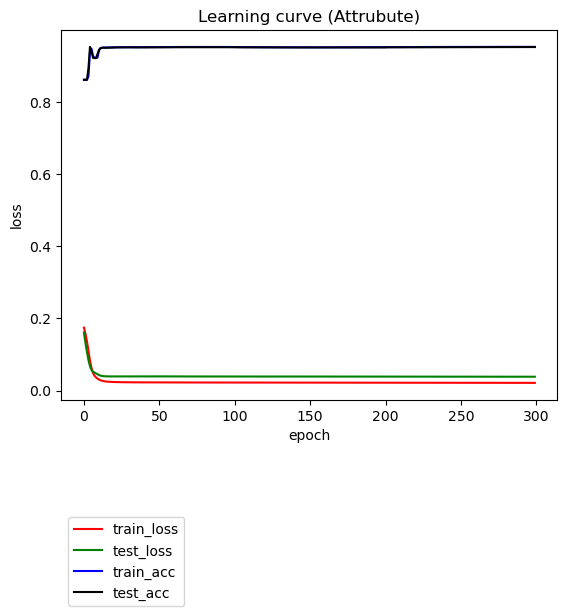


a_weight1: 
-0.5166746,-2.34801,0.9793843,-1.7526127,-2.3147795,-1.9199976,-2.4302073,0.16906245,-0.45742124,-1.210546,-0.66755205,-9.608646,1.2986376,-1.314109,-5.792112,-2.4086103,-3.5551329,0.24874085,-0.37562245,-0.8917722,-1.1779759,-1.4227533,1.3799026,-0.3813018,-1.0507917,-0.72751546,-0.56904995,-0.70724493,-1.0510459,-0.63055325,-1.1401241,0.8015635,0.8607689,-1.4674582,0.16472988,-0.79142827,-0.46736857,-1.3408438,-1.0849175,-1.350057,-0.6454564,0.6780806,1.1103259,-0.5615935,0.31300697,-0.43147308,-0.009774169,-1.0312908,-0.84521127,-0.7299738,

a_bias1: 
1.2251949,0.80668575,-0.29991695,0.8025599,0.6555983,0.32869768,0.5062176,1.5596902,1.1477704,1.0704854,

a_weight2: 
-1.7727357,-3.2637131,2.7067785,-1.6776357,-2.6042373,-1.4092748,-2.1135283,-2.0777564,-1.718004,-1.748398,

a_bias2: 
2.2187636,

In [2]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,2,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_noOEF_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_noOEF_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1729 - acc: 0.8613 - val_loss: 0.1630 - val_acc: 0.8611
Epoch 2/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1574 - acc: 0.8613 - val_loss: 0.1388 - val_acc: 0.8611
Epoch 3/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1340 - acc: 0.8619 - val_loss: 0.1146 - val_acc: 0.8653
Epoch 4/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.1055 - acc: 0.9020 - val_loss: 0.0920 - val_acc: 0.9542
Epoch 5/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0793 - acc: 0.9502 - val_loss: 0.0738 - val_acc: 0.9453
Epoch 6/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0594 - acc: 0.9427 - val_loss: 0.0605 - val_acc: 0.9404
Epoch 7/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0460 - acc: 0.9354 - val_loss: 0.0529 - val_acc: 0.9329
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0257 - acc: 0.9487 - val_loss: 0.0400 - val_acc: 0.9492
Epoch 61/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0257 - acc: 0.9488 - val_loss: 0.0400 - val_acc: 0.9493
Epoch 62/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0257 - acc: 0.9488 - val_loss: 0.0401 - val_acc: 0.9492
Epoch 63/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0257 - acc: 0.9487 - val_loss: 0.0400 - val_acc: 0.9493
Epoch 64/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0257 - acc: 0.9488 - val_loss: 0.0400 - val_acc: 0.9493
Epoch 65/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0256 - acc: 0.9488 - val_loss: 0.0400 - val_acc: 0.9493
Epoch 66/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0256 - acc: 0.9488 - val_loss: 0.0400 - val_acc: 0.9493
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0255 - acc: 0.9478 - val_loss: 0.0400 - val_acc: 0.9483
Epoch 120/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0255 - acc: 0.9478 - val_loss: 0.0399 - val_acc: 0.9483
Epoch 121/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0255 - acc: 0.9478 - val_loss: 0.0400 - val_acc: 0.9483
Epoch 122/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0255 - acc: 0.9477 - val_loss: 0.0399 - val_acc: 0.9483
Epoch 123/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0255 - acc: 0.9478 - val_loss: 0.0400 - val_acc: 0.9482
Epoch 124/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0255 - acc: 0.9477 - val_loss: 0.0399 - val_acc: 0.9483
Epoch 125/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0255 - acc: 0.9478 - val_loss: 0.0399 - val_acc: 0.9483
Epoch 126/300
15396/

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9469 - val_loss: 0.0399 - val_acc: 0.9473
Epoch 178/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9469 - val_loss: 0.0399 - val_acc: 0.9473
Epoch 179/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9469 - val_loss: 0.0399 - val_acc: 0.9473
Epoch 180/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9469 - val_loss: 0.0400 - val_acc: 0.9473
Epoch 181/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0252 - acc: 0.9468 - val_loss: 0.0399 - val_acc: 0.9473
Epoch 182/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9468 - val_loss: 0.0400 - val_acc: 0.9471
Epoch 183/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0252 - acc: 0.9468 - val_loss: 0.0400 - val_acc: 0.9471
Epoch 184/300
15396/15396 [=======

15396/15396 [==============================] - 17s 1ms/step - loss: 0.0247 - acc: 0.9434 - val_loss: 0.0403 - val_acc: 0.9438
Epoch 236/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9434 - val_loss: 0.0404 - val_acc: 0.9438
Epoch 237/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0247 - acc: 0.9434 - val_loss: 0.0403 - val_acc: 0.9438
Epoch 238/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0246 - acc: 0.9434 - val_loss: 0.0404 - val_acc: 0.9438
Epoch 239/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9434 - val_loss: 0.0404 - val_acc: 0.9439
Epoch 240/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9434 - val_loss: 0.0404 - val_acc: 0.9439
Epoch 241/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0246 - acc: 0.9434 - val_loss: 0.0403 - val_acc: 0.9439
Epoch 242/300
15396/15396 [=======

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0241 - acc: 0.9449 - val_loss: 0.0402 - val_acc: 0.9448
Epoch 294/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0241 - acc: 0.9450 - val_loss: 0.0402 - val_acc: 0.9455
Epoch 295/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0241 - acc: 0.9450 - val_loss: 0.0402 - val_acc: 0.9455
Epoch 296/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0241 - acc: 0.9451 - val_loss: 0.0402 - val_acc: 0.9455
Epoch 297/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0241 - acc: 0.9451 - val_loss: 0.0402 - val_acc: 0.9455
Epoch 298/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0241 - acc: 0.9451 - val_loss: 0.0402 - val_acc: 0.9455
Epoch 299/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0241 - acc: 0.9452 - val_loss: 0.0402 - val_acc: 0.9455
Epoch 300/300
15396/15396 [=======

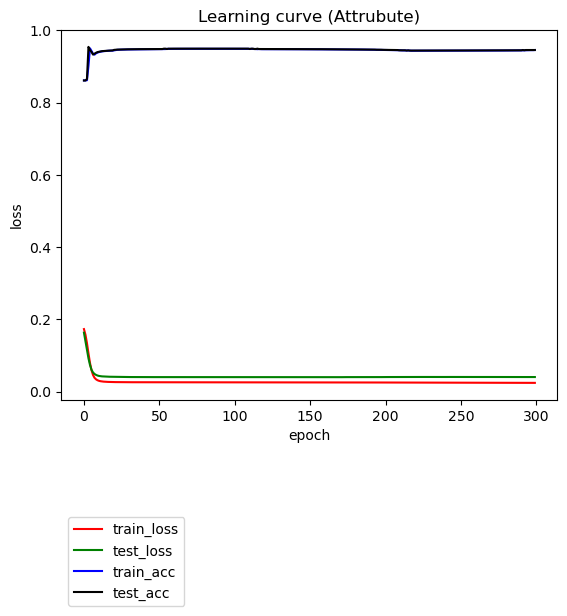


a_weight1: 
0.12422844,2.1722813,-2.7424471,0.27706152,-1.7281861,-0.71165144,1.5237622,-2.0214732,-0.15805633,-1.9952041,-0.76654726,1.5269986,-2.0584462,-0.84367245,-1.5400312,-0.80645764,1.0431442,-4.3246017,-0.8557564,-5.203639,-0.6686125,0.5128012,-0.1035518,-0.57978064,-0.99686754,-1.2579911,0.93344957,-1.1048361,-0.530084,-1.3639923,0.44074535,0.7175232,-1.008314,0.5716381,-0.5822218,0.094713844,0.18408804,-0.8899316,0.40140465,-0.76890326,-1.8106934,0.6532719,-0.15085113,-1.9378635,-0.61461574,-1.385558,1.1551249,1.0000432,-1.7907073,1.2431179,

a_bias1: 
1.6211717,-0.70532924,0.45557737,1.703618,0.7289663,1.355676,-1.0318582,0.77044785,1.6874118,0.9753058,

a_weight2: 
-1.5261843,2.288457,-1.7856253,-1.715803,-1.4259417,-1.50811,2.4186714,-2.6426728,-1.6281725,-3.2672367,

a_bias2: 
1.4025606,

In [3]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,2,3,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_noFLM_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_noFLM_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.1736 - acc: 0.8615 - val_loss: 0.1586 - val_acc: 0.8605
Epoch 2/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.1564 - acc: 0.8615 - val_loss: 0.1302 - val_acc: 0.8605
Epoch 3/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.1383 - acc: 0.8615 - val_loss: 0.1082 - val_acc: 0.8605
Epoch 4/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.1182 - acc: 0.8615 - val_loss: 0.0902 - val_acc: 0.8605
Epoch 5/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0995 - acc: 0.8785 - val_loss: 0.0770 - val_acc: 0.8931
Epoch 6/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0839 - acc: 0.9279 - val_loss: 0.0672 - val_acc: 0.9577
Epoch 7/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0715 - acc: 0.9545 - val_loss: 0.0600 - val_acc: 0.9516
Epoch 8/300
15396/15396 [=========

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0384 - val_acc: 0.9514
Epoch 61/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9516 - val_loss: 0.0384 - val_acc: 0.9515
Epoch 62/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9517 - val_loss: 0.0384 - val_acc: 0.9514
Epoch 63/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0227 - acc: 0.9517 - val_loss: 0.0385 - val_acc: 0.9515
Epoch 64/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0227 - acc: 0.9517 - val_loss: 0.0385 - val_acc: 0.9515
Epoch 65/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0226 - acc: 0.9517 - val_loss: 0.0385 - val_acc: 0.9515
Epoch 66/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0226 - acc: 0.9517 - val_loss: 0.0385 - val_acc: 0.9515
Epoch 67/300
15396/15396 [==============

Epoch 119/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9517
Epoch 120/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9517
Epoch 121/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9517
Epoch 122/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9517
Epoch 123/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9517
Epoch 124/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9518
Epoch 125/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0224 - acc: 0.9519 - val_loss: 0.0387 - val_acc: 0.9517
Epoch 126/300
15396/

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0387 - val_acc: 0.9518
Epoch 178/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 179/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0386 - val_acc: 0.9519
Epoch 180/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0386 - val_acc: 0.9519
Epoch 181/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0386 - val_acc: 0.9519
Epoch 182/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0386 - val_acc: 0.9519
Epoch 183/300
15396/15396 [==============================] - 17s 1ms/step - loss: 0.0222 - acc: 0.9520 - val_loss: 0.0386 - val_acc: 0.9519
Epoch 184/300
15396/15396 [=======

15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9521 - val_loss: 0.0385 - val_acc: 0.9518
Epoch 236/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9520 - val_loss: 0.0385 - val_acc: 0.9518
Epoch 237/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9521 - val_loss: 0.0385 - val_acc: 0.9518
Epoch 238/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9520 - val_loss: 0.0385 - val_acc: 0.9518
Epoch 239/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9520 - val_loss: 0.0385 - val_acc: 0.9519
Epoch 240/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0221 - acc: 0.9521 - val_loss: 0.0385 - val_acc: 0.9518
Epoch 241/300
15396/15396 [==============================] - 16s 1ms/step - loss: 0.0220 - acc: 0.9521 - val_loss: 0.0385 - val_acc: 0.9518
Epoch 242/300
15396/15396 [=======

15396/15396 [==============================] - 15s 953us/step - loss: 0.0219 - acc: 0.9520 - val_loss: 0.0384 - val_acc: 0.9517
Epoch 294/300
15396/15396 [==============================] - 15s 956us/step - loss: 0.0219 - acc: 0.9519 - val_loss: 0.0384 - val_acc: 0.9517
Epoch 295/300
15396/15396 [==============================] - 15s 956us/step - loss: 0.0219 - acc: 0.9520 - val_loss: 0.0384 - val_acc: 0.9517
Epoch 296/300
15396/15396 [==============================] - 15s 958us/step - loss: 0.0219 - acc: 0.9519 - val_loss: 0.0385 - val_acc: 0.9517
Epoch 297/300
15396/15396 [==============================] - 15s 957us/step - loss: 0.0219 - acc: 0.9519 - val_loss: 0.0384 - val_acc: 0.9517
Epoch 298/300
15396/15396 [==============================] - 15s 960us/step - loss: 0.0219 - acc: 0.9519 - val_loss: 0.0384 - val_acc: 0.9517
Epoch 299/300
15396/15396 [==============================] - 15s 956us/step - loss: 0.0219 - acc: 0.9519 - val_loss: 0.0384 - val_acc: 0.9517
Epoch 300/300
15396/

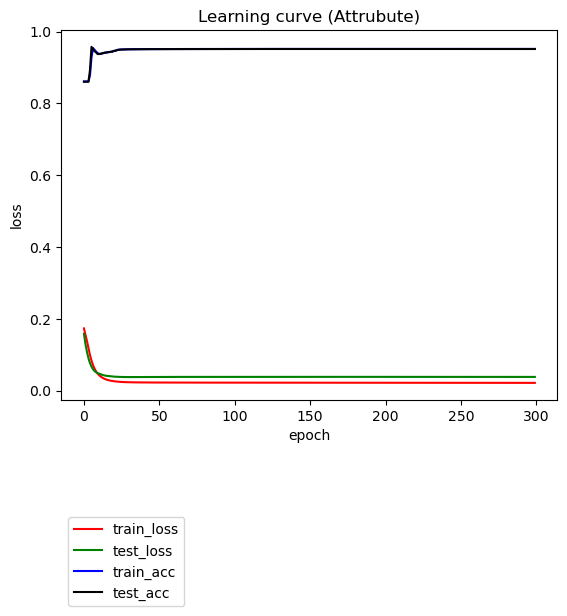


a_weight1: 
-1.1387593,-1.1369098,-0.918848,-1.8153266,-0.8935258,-1.13997,-1.4731684,-1.7909415,-1.4803032,-1.6373569,-1.9809884,-1.3630034,-0.9361459,-5.78333,-0.53442895,-1.3911338,-2.082007,-4.936007,-2.5162196,-4.1967373,-1.8071579,-1.1915222,-1.0896866,-2.0262504,-0.9877597,-1.2198961,-1.4931276,-1.7659172,-1.7531855,-1.9288249,-0.50619835,-0.16091985,0.30017477,-0.41182548,0.3799208,-0.04821401,-0.534679,-0.44265425,-0.56738514,-0.40662122,-1.3952572,-1.9977554,-2.6531887,0.1134726,-3.239504,-2.0642226,-1.4138966,0.013125884,-1.1729039,-0.3310936,

a_bias1: 
0.85549504,1.228401,1.3712062,1.5127126,1.3222247,1.1830859,0.9870187,1.2525519,1.0087614,1.2241693,

a_weight2: 
-1.8492403,-2.0587473,-2.3359597,-3.4475422,-2.292189,-2.012564,-1.9897199,-2.9342256,-2.0976121,-2.859445,

a_bias2: 
4.046795,

In [4]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 5
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,2,3,5,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights, sample_weight=sample_weights)

model.save_weights(r'revision/att_model_noPPS_withsamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_noPPS_withsamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

Epoch 1/300
15396/15396 [==============================] - 15s 962us/step - loss: 0.2448 - acc: 0.9026 - val_loss: 0.2296 - val_acc: 0.9523
Epoch 2/300
15396/15396 [==============================] - 15s 960us/step - loss: 0.2162 - acc: 0.9338 - val_loss: 0.1869 - val_acc: 0.9221
Epoch 3/300
15396/15396 [==============================] - 15s 976us/step - loss: 0.1672 - acc: 0.9155 - val_loss: 0.1404 - val_acc: 0.9107
Epoch 4/300
15396/15396 [==============================] - 15s 953us/step - loss: 0.1189 - acc: 0.9085 - val_loss: 0.1013 - val_acc: 0.9082
Epoch 5/300
15396/15396 [==============================] - 15s 955us/step - loss: 0.0838 - acc: 0.9087 - val_loss: 0.0764 - val_acc: 0.9092
Epoch 6/300
15396/15396 [==============================] - 15s 962us/step - loss: 0.0637 - acc: 0.9095 - val_loss: 0.0653 - val_acc: 0.9123
Epoch 7/300
15396/15396 [==============================] - 15s 961us/step - loss: 0.0543 - acc: 0.9136 - val_loss: 0.0601 - val_acc: 0.9154
Epoch 8/300
15396/15

15396/15396 [==============================] - 15s 953us/step - loss: 0.0370 - acc: 0.9364 - val_loss: 0.0492 - val_acc: 0.9364
Epoch 60/300
15396/15396 [==============================] - 15s 953us/step - loss: 0.0370 - acc: 0.9364 - val_loss: 0.0493 - val_acc: 0.9364
Epoch 61/300
15396/15396 [==============================] - 15s 953us/step - loss: 0.0370 - acc: 0.9365 - val_loss: 0.0493 - val_acc: 0.9363
Epoch 62/300
15396/15396 [==============================] - 15s 972us/step - loss: 0.0370 - acc: 0.9364 - val_loss: 0.0492 - val_acc: 0.9366
Epoch 63/300
15396/15396 [==============================] - 15s 961us/step - loss: 0.0370 - acc: 0.9364 - val_loss: 0.0492 - val_acc: 0.9366
Epoch 64/300
15396/15396 [==============================] - 15s 975us/step - loss: 0.0370 - acc: 0.9365 - val_loss: 0.0493 - val_acc: 0.9366
Epoch 65/300
15396/15396 [==============================] - 15s 969us/step - loss: 0.0370 - acc: 0.9365 - val_loss: 0.0493 - val_acc: 0.9366
Epoch 66/300
15396/15396 [

15396/15396 [==============================] - 15s 964us/step - loss: 0.0368 - acc: 0.9370 - val_loss: 0.0491 - val_acc: 0.9365
Epoch 118/300
15396/15396 [==============================] - 15s 969us/step - loss: 0.0368 - acc: 0.9365 - val_loss: 0.0491 - val_acc: 0.9376
Epoch 119/300
15396/15396 [==============================] - 15s 963us/step - loss: 0.0368 - acc: 0.9369 - val_loss: 0.0491 - val_acc: 0.9365
Epoch 120/300
15396/15396 [==============================] - 15s 945us/step - loss: 0.0367 - acc: 0.9368 - val_loss: 0.0491 - val_acc: 0.9365
Epoch 121/300
15396/15396 [==============================] - 15s 955us/step - loss: 0.0367 - acc: 0.9367 - val_loss: 0.0490 - val_acc: 0.9365
Epoch 122/300
15396/15396 [==============================] - 15s 950us/step - loss: 0.0367 - acc: 0.9370 - val_loss: 0.0491 - val_acc: 0.9365
Epoch 123/300
15396/15396 [==============================] - 15s 957us/step - loss: 0.0367 - acc: 0.9368 - val_loss: 0.0491 - val_acc: 0.9365
Epoch 124/300
15396/

Epoch 175/300
15396/15396 [==============================] - 15s 958us/step - loss: 0.0361 - acc: 0.9363 - val_loss: 0.0475 - val_acc: 0.9364
Epoch 176/300
15396/15396 [==============================] - 15s 959us/step - loss: 0.0360 - acc: 0.9364 - val_loss: 0.0475 - val_acc: 0.9364
Epoch 177/300
15396/15396 [==============================] - 15s 954us/step - loss: 0.0360 - acc: 0.9363 - val_loss: 0.0474 - val_acc: 0.9364
Epoch 178/300
15396/15396 [==============================] - 15s 963us/step - loss: 0.0360 - acc: 0.9364 - val_loss: 0.0474 - val_acc: 0.9364
Epoch 179/300
15396/15396 [==============================] - 15s 982us/step - loss: 0.0360 - acc: 0.9364 - val_loss: 0.0474 - val_acc: 0.9364
Epoch 180/300
15396/15396 [==============================] - 15s 966us/step - loss: 0.0360 - acc: 0.9364 - val_loss: 0.0474 - val_acc: 0.9364
Epoch 181/300
15396/15396 [==============================] - 15s 982us/step - loss: 0.0360 - acc: 0.9364 - val_loss: 0.0473 - val_acc: 0.9364
Epoch 

Epoch 233/300
15396/15396 [==============================] - 15s 973us/step - loss: 0.0355 - acc: 0.9364 - val_loss: 0.0463 - val_acc: 0.9365
Epoch 234/300
15396/15396 [==============================] - 15s 967us/step - loss: 0.0355 - acc: 0.9364 - val_loss: 0.0463 - val_acc: 0.9365
Epoch 235/300
15396/15396 [==============================] - 15s 965us/step - loss: 0.0355 - acc: 0.9364 - val_loss: 0.0463 - val_acc: 0.9365
Epoch 236/300
15396/15396 [==============================] - 15s 953us/step - loss: 0.0355 - acc: 0.9364 - val_loss: 0.0462 - val_acc: 0.9365
Epoch 237/300
15396/15396 [==============================] - 15s 965us/step - loss: 0.0355 - acc: 0.9364 - val_loss: 0.0463 - val_acc: 0.9365
Epoch 238/300
15396/15396 [==============================] - 15s 967us/step - loss: 0.0355 - acc: 0.9364 - val_loss: 0.0463 - val_acc: 0.9364
Epoch 239/300
15396/15396 [==============================] - 15s 960us/step - loss: 0.0354 - acc: 0.9364 - val_loss: 0.0463 - val_acc: 0.9364
Epoch 

Epoch 291/300
15396/15396 [==============================] - 15s 971us/step - loss: 0.0353 - acc: 0.9364 - val_loss: 0.0460 - val_acc: 0.9364
Epoch 292/300
15396/15396 [==============================] - 15s 961us/step - loss: 0.0353 - acc: 0.9364 - val_loss: 0.0460 - val_acc: 0.9364
Epoch 293/300
15396/15396 [==============================] - 15s 969us/step - loss: 0.0353 - acc: 0.9363 - val_loss: 0.0459 - val_acc: 0.9364
Epoch 294/300
15396/15396 [==============================] - 15s 962us/step - loss: 0.0353 - acc: 0.9363 - val_loss: 0.0459 - val_acc: 0.9364
Epoch 295/300
15396/15396 [==============================] - 15s 965us/step - loss: 0.0353 - acc: 0.9363 - val_loss: 0.0459 - val_acc: 0.9364
Epoch 296/300
15396/15396 [==============================] - 15s 966us/step - loss: 0.0353 - acc: 0.9364 - val_loss: 0.0459 - val_acc: 0.9364
Epoch 297/300
15396/15396 [==============================] - 15s 969us/step - loss: 0.0353 - acc: 0.9363 - val_loss: 0.0459 - val_acc: 0.9364
Epoch 

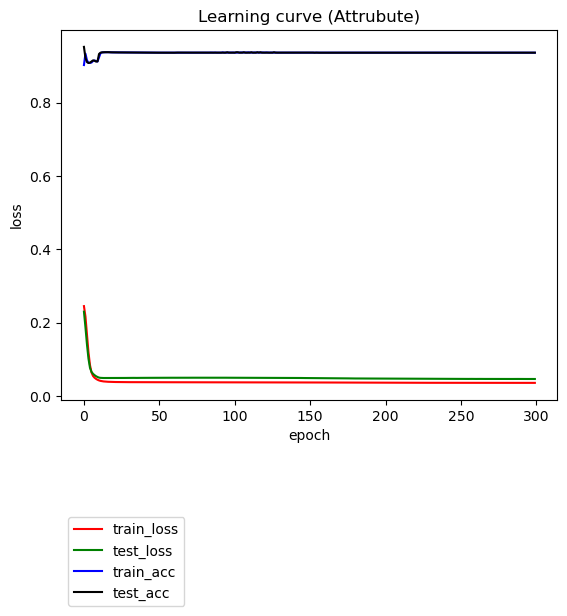


a_weight1: 
-2.2282238,1.5082263,-1.4550549,0.07871822,-2.2955728,-0.89525557,0.12615408,-1.4593712,-1.5934635,1.2826803,-6.444388,3.3276458,-1.9475616,0.30896083,-7.4476767,-0.9743872,0.21152054,-2.8847346,-1.9166577,1.6425736,-1.3569773,1.5544455,-1.0305976,0.21814531,-1.4208947,-0.71192527,0.1798074,-1.576084,-0.88443863,1.0235685,-0.74006397,0.6271373,-0.60346544,0.32966566,-0.706698,-0.30191416,-0.17539723,-0.5867099,-0.72436005,0.544213,0.44915223,0.099223435,-0.82716256,-1.6449171,0.55166364,-1.2782513,1.2106465,-0.2916362,-0.861184,1.02029,0.7001574,-0.00955768,-0.56719893,-1.1687741,0.8080586,-0.98685855,0.9651806,-0.20822862,-0.47568738,0.83285505,

a_bias1: 
0.74395066,-0.7259866,0.75049734,1.4569955,0.71181655,0.9818493,-1.3561007,0.73863983,0.80046135,-0.8777117,

a_weight2: 
-2.7678368,1.4442427,-1.6867114,-2.0754611,-2.9210782,-1.5928057,1.5264875,-1.9541576,-1.650517,1.406484,

a_bias2: 
0.52815324,

In [5]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 300
batchs = 128
splits = 0.2
lr        = 1e-5
input_dim = 6
opt = Adam(learning_rate=lr,weight_decay=1e-5/128)

concatenated_df=pd.read_csv("extraFeatures_Att.csv", header=None)
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,1,2,3,5,6,8,9]]## 'MPD','CBF','CUD','OEF','CUC','FLM','PPS','Label','tempRDCost','bestRDCost'
Y = XY[:,[7]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)
cost=x_train[:,[input_dim,input_dim+1]]
x_train=x_train[:,0:input_dim]
x_test=x_test[:,0:input_dim]

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train_flatten = y_train.flatten()
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flatten), y=y_train_flatten)
class_weights = dict(zip(np.unique(y_train_flatten),class_weights))
# cost_max = np.max(cost[:,0])
# cost_min = np.min(cost[:,0])
# cost_average = np.average(cost[:,0])
# sample_weightss = np.array((cost[:,0]-cost_min)/(cost_max-cost_min))
# sample_weightss = np.array(cost[:,0]/cost_average)
sample_num=np.size(y_train,0)
cost_sum=0
cost_num=0
cost_difference = []
for sample in np.concatenate([cost,y_train],axis=1):
    cost_difference_value = sample[0]-sample[1]
    if (sample[2]==0)&(cost_difference_value!=0):
        cost_difference.append(0)
    elif (sample[2]==0)&(cost_difference_value==0):
        cost_difference.append(1)
    elif (sample[2]==1)&(cost_difference_value<=0):
        cost_difference.append(0)
    else:
        cost_difference.append(cost_difference_value)
        cost_sum+=cost_difference_value
        cost_num+=1
sample_weights = np.array(cost_difference)
cost_average=cost_sum/cost_num
for i in range(sample_num):
    if (y_train[i]==1)&(sample_weights[i]!=0):
        sample_weights[i]=sample_weights[i]/cost_average
    if sample_weights[i]>1:
        sample_weights[i]=1
    elif sample_weights[i]<0:
        sample_weights[i]=0

history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights)

model.save_weights(r'revision/att_model_allFeatures_nosamplewight.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('Learning curve (Attrubute)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_AttTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('revision/att_model_allFeatures_nosamplewight.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)
    
np.set_printoptions(suppress=True)

a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
# a_weight3=model.get_weights()[4]
# a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")